In [1]:
import datetime
print(datetime.datetime.now())

2020-07-27 01:15:01.630769


In [2]:
#import modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score, silhouette_samples
from sklearn.preprocessing import StandardScaler,MinMaxScaler
from sklearn.cluster import KMeans, DBSCAN, AgglomerativeClustering
from sklearn.mixture import GaussianMixture
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


In [3]:
data = pd.read_csv('C:\\Users\sharg\Desktop\Geeta College Assignments\831 Marketing Analy\Project\cleanedup_dataset.csv')

data.shape
list(data)
data.describe().transpose()
data.dtypes

C:\Users\sharg\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3058: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


(45202, 22)

['Unnamed: 0',
 'ID',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'contact',
 'day',
 'month',
 'campaign',
 'pdays',
 'previous',
 'term_deposit',
 'age_group',
 'job_surrogate',
 'education_surrogate',
 'contact_surrogate',
 'pdays_surrogate']

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,45202.0,22602.664838,13050.378794,1.0,11301.25,22601.5,33904.75,45211.0
ID,45202.0,22602.664838,13050.378794,1.0,11301.25,22601.5,33904.75,45211.0
age,45202.0,40.925910,10.594669,18.0,33.00,39.0,48.00,89.0
balance,45202.0,1362.381156,3045.045782,-8019.0,72.00,448.0,1428.00,102127.0
day,45202.0,15.807022,8.322106,1.0,8.00,16.0,21.00,31.0
campaign,45202.0,2.763639,3.097562,1.0,1.00,2.0,3.00,63.0
previous,45202.0,0.580019,2.303094,0.0,0.00,0.0,0.00,275.0
term_deposit,45202.0,0.116853,0.321249,0.0,0.00,0.0,0.00,1.0
job_surrogate,45202.0,0.006371,0.079567,0.0,0.00,0.0,0.00,1.0
education_surrogate,45202.0,0.040994,0.198278,0.0,0.00,0.0,0.00,1.0


Unnamed: 0              int64
ID                      int64
age                     int64
job                    object
marital                object
education              object
default                object
balance                 int64
housing                object
loan                   object
contact                object
day                     int64
month                  object
campaign                int64
pdays                  object
previous                int64
term_deposit            int64
age_group              object
job_surrogate           int64
education_surrogate     int64
contact_surrogate       int64
pdays_surrogate        object
dtype: object

In [4]:
df1 = pd.get_dummies(data.marital)
df2 = pd.get_dummies(data.education)
df3 = pd.get_dummies(data.contact)

df1
df2
df3

,divorced,married,single
0,0,1,0
1,0,0,1
2,0,1,0
3,0,1,0
4,0,0,1
...,...,...,...
45197,0,1,0
45198,1,0,0
45199,0,1,0
45200,0,1,0


,FIXED_NA,primary,secondary,tertiary
0,0,0,0,1
1,0,0,1,0
2,0,0,1,0
3,1,0,0,0
4,1,0,0,0
...,...,...,...,...
45197,0,0,0,1
45198,0,1,0,0
45199,0,0,1,0
45200,0,0,1,0


,FIXED_NA,cellular,telephone
0,1,0,0
1,1,0,0
2,1,0,0
3,1,0,0
4,1,0,0
...,...,...,...
45197,0,1,0
45198,0,1,0
45199,0,1,0
45200,0,0,1


In [5]:
data = pd.concat([data,df1,df2,df3],axis='columns')

In [6]:
data.dtypes
data['job'].unique()
data['balance'].unique()
len(data['balance'].unique().tolist())
data['contact'].unique()
data['month'].unique
data['education'].unique().tolist()
data['pdays'].unique()
data['age_group'].unique()
data['term_deposit'].unique()
data.isnull().sum()
data['loan'].unique()
data['default'].unique()
data['loan'].unique()
data['housing'].unique()

Unnamed: 0              int64
ID                      int64
age                     int64
job                    object
marital                object
education              object
default                object
balance                 int64
housing                object
loan                   object
contact                object
day                     int64
month                  object
campaign                int64
pdays                  object
previous                int64
term_deposit            int64
age_group              object
job_surrogate           int64
education_surrogate     int64
contact_surrogate       int64
pdays_surrogate        object
divorced                uint8
married                 uint8
single                  uint8
FIXED_NA                uint8
primary                 uint8
secondary               uint8
tertiary                uint8
FIXED_NA                uint8
cellular                uint8
telephone               uint8
dtype: object

array(['management', 'technician', 'entrepreneur', 'blue-collar',
       'FIXED_NA', 'retired', 'admin.', 'services', 'self-employed',
       'unemployed', 'housemaid', 'student'], dtype=object)

array([ 2143,    29,     2, ...,  8205, 14204, 16353], dtype=int64)

7168

array(['FIXED_NA', 'cellular', 'telephone'], dtype=object)

<bound method Series.unique of 0        may
1        may
2        may
3        may
4        may
        ... 
45197    nov
45198    nov
45199    nov
45200    nov
45201    nov
Name: month, Length: 45202, dtype: object>

['tertiary', 'secondary', 'FIXED_NA', 'primary']

array(['no_contact', '151-180', '91-120', '61-90', '121-150', '181-210',
       '30-Jan', '31-60', '241-270', '211-240', '271-300', '301-330',
       '331-360', '361-390', '390+', 'Other.pdays'], dtype=object)

array(['56-60', '41-45', '31-35', '46-50', '36-40', '26-30', '51-55',
       '61-65', '21-25', '66-70', '81-85', '76-80', '71-75', '15-20',
       '86-90'], dtype=object)

array([0, 1], dtype=int64)

Unnamed: 0             0
ID                     0
age                    0
job                    0
marital                0
education              0
default                0
balance                0
housing                0
loan                   0
contact                0
day                    0
month                  0
campaign               0
pdays                  0
previous               0
term_deposit           0
age_group              0
job_surrogate          0
education_surrogate    0
contact_surrogate      0
pdays_surrogate        0
divorced               0
married                0
single                 0
FIXED_NA               0
primary                0
secondary              0
tertiary               0
FIXED_NA               0
cellular               0
telephone              0
dtype: int64

array(['no', 'yes'], dtype=object)

array(['no', 'yes'], dtype=object)

array(['no', 'yes'], dtype=object)

array(['yes', 'no'], dtype=object)

In [7]:
data = data.drop(['contact'],axis=1)
data.dtypes

Unnamed: 0              int64
ID                      int64
age                     int64
job                    object
marital                object
education              object
default                object
balance                 int64
housing                object
loan                   object
day                     int64
month                  object
campaign                int64
pdays                  object
previous                int64
term_deposit            int64
age_group              object
job_surrogate           int64
education_surrogate     int64
contact_surrogate       int64
pdays_surrogate        object
divorced                uint8
married                 uint8
single                  uint8
FIXED_NA                uint8
primary                 uint8
secondary               uint8
tertiary                uint8
FIXED_NA                uint8
cellular                uint8
telephone               uint8
dtype: object

In [27]:
df= data.copy()
df['housing'] = df['housing'].replace(['yes','no'],[True,False])
df['default'] = df['default'].replace(['yes','no'],[True,False])
df['loan'] = df['loan'].replace(['yes','no'],[True,False])
df = df.drop(['age','job','marital','education','month','Unnamed: 0', 'ID','pdays','pdays_surrogate','divorced','contact_surrogate','job_surrogate','education_surrogate'],axis=1)
df
df['age_group'].unique()
df.dtypes

,default,balance,housing,loan,day,campaign,previous,term_deposit,age_group,married,single,FIXED_NA,primary,secondary,tertiary,FIXED_NA,cellular,telephone
0,False,2143,True,False,5,1,0,0,56-60,1,0,0,0,0,1,1,0,0
1,False,29,True,False,5,1,0,0,41-45,0,1,0,0,1,0,1,0,0
2,False,2,True,True,5,1,0,0,31-35,1,0,0,0,1,0,1,0,0
3,False,1506,True,False,5,1,0,0,46-50,1,0,1,0,0,0,1,0,0
4,False,1,False,False,5,1,0,0,31-35,0,1,1,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45197,False,825,False,False,17,3,0,1,51-55,1,0,0,0,0,1,0,1,0
45198,False,1729,False,False,17,2,0,1,71-75,0,0,0,1,0,0,0,1,0
45199,False,5715,False,False,17,5,3,1,71-75,1,0,0,0,1,0,0,1,0
45200,False,668,False,False,17,4,0,0,56-60,1,0,0,0,1,0,0,0,1


array(['56-60', '41-45', '31-35', '46-50', '36-40', '26-30', '51-55',
       '61-65', '21-25', '66-70', '81-85', '76-80', '71-75', '15-20',
       '86-90'], dtype=object)

default           bool
balance          int64
housing           bool
loan              bool
day              int64
campaign         int64
previous         int64
term_deposit     int64
age_group       object
married          uint8
single           uint8
FIXED_NA         uint8
primary          uint8
secondary        uint8
tertiary         uint8
FIXED_NA         uint8
cellular         uint8
telephone        uint8
dtype: object

In [28]:
# Default plot settings
small_size = 12
medium_size = 14
large_size = 16


plt.rc('figure', figsize=[8.0, 6.0])     # controls the size of the figure
plt.rc('font', size=small_size)          # controls default text sizes
plt.rc('axes', titlesize=small_size)     # fontsize of the axes title
plt.rc('axes', labelsize=medium_size)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=small_size)    # fontsize of the tick labels
plt.rc('ytick', labelsize=small_size)    # fontsize of the tick labels
plt.rc('legend', fontsize=small_size)    # legend fontsize
plt.rc('figure', titlesize=large_size)  # fontsize of the figure title
plt.rc('axes', grid=True)

In [29]:
n_features = df.shape[1]
cat_col_names = list(df.select_dtypes(include=np.object).columns)
num_col_names = list(df.select_dtypes(include=np.number).columns)
bol_col_names=list(df.select_dtypes(include=np.bool).columns)
print('cat_col_names: {}'.format(cat_col_names))
print('num_col_names: {}'.format(num_col_names))
print('bol_col_names: {}'.format(bol_col_names))
df.describe(include=[np.object,np.bool]).transpose()

cat_col_names: ['age_group']
num_col_names: ['balance', 'day', 'campaign', 'previous', 'term_deposit', 'married', 'single', 'FIXED_NA', 'primary', 'secondary', 'tertiary', 'FIXED_NA', 'cellular', 'telephone']
bol_col_names: ['default', 'housing', 'loan']


,count,unique,top,freq
default,45202,2,False,44387
housing,45202,2,True,25130
loan,45202,2,False,37958
age_group,45202,15,31-35,9740


In [39]:
column = df.columns

# Scalling the numeric values

In [31]:
from sklearn.preprocessing import StandardScaler
X_num = df[num_col_names].to_numpy()
X_cat = df[cat_col_names].to_numpy()
X_bol= df[bol_col_names].to_numpy()
scaler = StandardScaler()
X_num = scaler.fit_transform(X_num)
X = np.concatenate((X_num, X_cat, X_bol), axis=1)
X

from scipy.spatial import distance

# Now, let's define our own function to handle both types of features

def custom_dist(x1, x2, cat_cols=None, num_cols=None, bol_cols=None):
   
    n = len(x1)
    #print(x1)
    #print(num_cols)
    #print(x1[num_cols])
    #print(x2)

    dist_num = distance.euclidean(x1[num_cols], x2[num_cols])
    #print(dist_num)
    dist_cat = distance.hamming(x1[cat_cols], x2[cat_cols])
    #print(dist_cat)
    dist_bol=distance.hamming(x1[bol_cols], x2[bol_cols])
    
    dist = (dist_num*sum(num_cols) + dist_cat*sum(cat_cols)+ dist_bol*sum(bol_cols)) / n
    #print(dist)
    return dist


array([[0.2563598498130296, -1.2986066050530414, -0.5693697581053427,
        ..., False, True, False],
       [-0.4378902652882348, -1.2986066050530414, -0.5693697581053427,
        ..., False, True, False],
       [-0.4467572251310608, -1.2986066050530414, -0.5693697581053427,
        ..., False, True, True],
       ...,
       [1.4294257964268975, 0.1433521075324315, 0.721982565320533, ...,
        False, False, False],
       [-0.22803888234135308, 0.1433521075324315, 0.39914448446406403,
        ..., False, False, False],
       [0.5282799516596932, 0.1433521075324315, -0.24653167724887382,
        ..., False, False, False]], dtype=object)

In [32]:
# Now, we call our custom distance metric on all pairs of rows in our dataset to create our own custom distance matrix.
from scipy.spatial.distance import pdist

cat_cols = [type(x)==str for x in X[1,:]]
num_cols = [not x for x in cat_cols]
bol_cols= [type(x)==str for x in X[1,:]]
# Warning: pdist is kind of slow
Y = pdist(X,custom_dist,cat_cols=cat_cols,num_cols=num_cols,bol_cols=bol_cols)


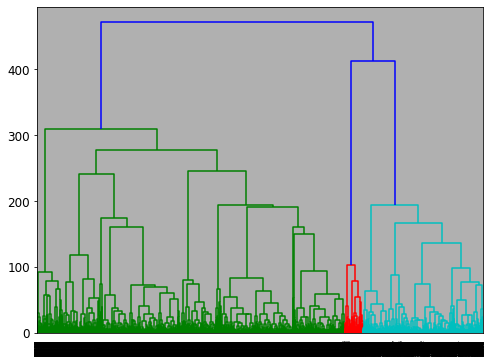

In [34]:
import scipy.cluster
aggl = scipy.cluster.hierarchy.linkage(Y, method='ward')
dend = scipy.cluster.hierarchy.dendrogram(aggl);

In [56]:
labels = scipy.cluster.hierarchy.fcluster(aggl, 5, criterion="maxclust")

In [57]:
from scipy import stats
import seaborn as sns

pd.set_option("display.precision", 2)
pd.set_option('display.float_format', lambda x: '%.2f' % x)

print('All Data:')
print('Number of Instances: {}'.format(X.shape[0]))
df.describe(include=[np.number]).transpose()
df.describe(include=[np.object]).transpose()
df.describe(include=[np.bool]).transpose()
for col in cat_col_names:
    df[col].value_counts()

for col in bol_col_names:
    df[col].value_counts()

for i, label in enumerate(set(labels)):
    n = df.iloc[labels==label].shape[0]
      
    print('\nCluster {}:'.format(label))
    print('Number of Instances: {}'.format(n))

    df.iloc[labels==label].describe(include=[np.number]).transpose()
    df.iloc[labels==label].describe(include=[np.object]).transpose()
    df.iloc[labels==label].describe(include=[np.bool]).transpose()
    for col in cat_col_names:
        df.iloc[labels==label][col].value_counts()
    for col in bol_col_names:
        df.iloc[labels==label][col].value_counts()
        

All Data:
Number of Instances: 45202


,count,mean,std,min,25%,50%,75%,max
balance,45202.00,1362.38,3045.05,-8019.00,72.00,448.00,1428.00,102127.00
day,45202.00,15.81,8.32,1.00,8.00,16.00,21.00,31.00
campaign,45202.00,2.76,3.10,1.00,1.00,2.00,3.00,63.00
previous,45202.00,0.58,2.30,0.00,0.00,0.00,0.00,275.00
term_deposit,45202.00,0.12,0.32,0.00,0.00,0.00,0.00,1.00
married,45202.00,0.60,0.49,0.00,0.00,1.00,1.00,1.00
single,45202.00,0.28,0.45,0.00,0.00,0.00,1.00,1.00
FIXED_NA,45202.00,0.04,0.20,0.00,0.00,0.00,0.00,1.00
primary,45202.00,0.15,0.36,0.00,0.00,0.00,0.00,1.00
secondary,45202.00,0.51,0.50,0.00,0.00,1.00,1.00,1.00


,count,unique,top,freq
age_group,45202,15,31-35,9740


,count,unique,top,freq
default,45202,2,False,44387
housing,45202,2,True,25130
loan,45202,2,False,37958


31-35    9740
36-40    8349
41-45    6185
46-50    5470
51-55    4488
26-30    4464
56-60    3922
61-65     974
21-25     762
66-70     256
71-75     254
76-80     170
81-85      98
15-20      47
86-90      23
Name: age_group, dtype: int64

False    44387
True       815
Name: default, dtype: int64

True     25130
False    20072
Name: housing, dtype: int64

False    37958
True      7244
Name: loan, dtype: int64


Cluster 1:
Number of Instances: 2663


,count,mean,std,min,25%,50%,75%,max
balance,2663.00,1670.00,3061.45,-1965.00,121.00,641.00,1944.50,35589.00
day,2663.00,16.55,8.67,1.00,9.00,17.00,23.00,31.00
campaign,2663.00,3.37,3.50,1.00,1.00,2.00,4.00,38.00
previous,2663.00,0.60,1.51,0.00,0.00,0.00,0.00,11.00
term_deposit,2663.00,0.13,0.33,0.00,0.00,0.00,0.00,1.00
married,2663.00,0.69,0.46,0.00,0.00,1.00,1.00,1.00
single,2663.00,0.22,0.41,0.00,0.00,0.00,0.00,1.00
FIXED_NA,2663.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
primary,2663.00,0.27,0.44,0.00,0.00,0.00,1.00,1.00
secondary,2663.00,0.50,0.50,0.00,0.00,0.00,1.00,1.00


,count,unique,top,freq
age_group,2663,15,56-60,418


,count,unique,top,freq
default,2663,2,False,2639
housing,2663,2,False,1572
loan,2663,2,False,2264


56-60    418
51-55    369
46-50    356
31-35    311
36-40    308
41-45    301
26-30    182
61-65    130
76-80     71
71-75     61
66-70     49
81-85     48
21-25     39
86-90     14
15-20      6
Name: age_group, dtype: int64

False    2639
True       24
Name: default, dtype: int64

False    1572
True     1091
Name: housing, dtype: int64

False    2264
True      399
Name: loan, dtype: int64


Cluster 2:
Number of Instances: 11924


,count,mean,std,min,25%,50%,75%,max
balance,11924.00,1956.28,4661.04,-6847.00,129.00,598.50,1872.00,102127.00
day,11924.00,15.79,8.33,1.00,8.00,16.00,22.00,31.00
campaign,11924.00,2.38,1.91,1.00,1.00,2.00,3.00,31.00
previous,11924.00,0.81,1.81,0.00,0.00,0.00,1.00,17.00
term_deposit,11924.00,0.31,0.46,0.00,0.00,0.00,1.00,1.00
married,11924.00,0.53,0.50,0.00,0.00,1.00,1.00,1.00
single,11924.00,0.36,0.48,0.00,0.00,0.00,1.00,1.00
FIXED_NA,11924.00,0.00,0.01,0.00,0.00,0.00,0.00,1.00
primary,11924.00,0.00,0.05,0.00,0.00,0.00,0.00,1.00
secondary,11924.00,0.17,0.38,0.00,0.00,0.00,0.00,1.00


,count,unique,top,freq
age_group,11924,14,31-35,3325


,count,unique,top,freq
default,11924,2,False,11773
housing,11924,2,False,6864
loan,11924,2,False,10379


31-35    3325
36-40    2333
26-30    1351
41-45    1323
46-50    1132
51-55     992
56-60     788
61-65     290
21-25     183
66-70      89
71-75      76
76-80      29
81-85       9
15-20       4
Name: age_group, dtype: int64

False    11773
True       151
Name: default, dtype: int64

False    6864
True     5060
Name: housing, dtype: int64

False    10379
True      1545
Name: loan, dtype: int64


Cluster 3:
Number of Instances: 16623


,count,mean,std,min,25%,50%,75%,max
balance,16623.00,1090.53,2027.19,-8019.00,49.00,378.00,1216.50,22856.00
day,16623.00,16.01,8.07,1.00,9.00,17.00,21.00,31.00
campaign,16623.00,3.11,4.04,1.00,1.00,2.00,3.00,63.00
previous,16623.00,0.84,3.32,0.00,0.00,0.00,0.00,275.00
term_deposit,16623.00,0.03,0.16,0.00,0.00,0.00,0.00,1.00
married,16623.00,0.63,0.48,0.00,0.00,1.00,1.00,1.00
single,16623.00,0.25,0.44,0.00,0.00,0.00,1.00,1.00
FIXED_NA,16623.00,0.00,0.03,0.00,0.00,0.00,0.00,1.00
primary,16623.00,0.22,0.41,0.00,0.00,0.00,0.00,1.00
secondary,16623.00,0.77,0.42,0.00,1.00,1.00,1.00,1.00


,count,unique,top,freq
age_group,16623,15,31-35,3617


,count,unique,top,freq
default,16623,2,False,16284
housing,16623,2,True,9352
loan,16623,2,False,13413


31-35    3617
36-40    2921
41-45    2376
46-50    2180
51-55    1652
26-30    1595
56-60    1422
61-65     321
21-25     242
71-75      99
66-70      90
76-80      45
81-85      35
15-20      21
86-90       7
Name: age_group, dtype: int64

False    16284
True       339
Name: default, dtype: int64

True     9352
False    7271
Name: housing, dtype: int64

False    13413
True      3210
Name: loan, dtype: int64


Cluster 4:
Number of Instances: 1831


,count,mean,std,min,25%,50%,75%,max
balance,1831.00,1471.13,2608.52,-1445.00,108.00,568.00,1697.00,23592.00
day,1831.00,15.75,8.67,1.00,8.00,16.00,22.00,31.00
campaign,1831.00,2.58,2.50,1.00,1.00,2.00,3.00,23.00
previous,1831.00,0.47,1.43,0.00,0.00,0.00,0.00,13.00
term_deposit,1831.00,0.13,0.34,0.00,0.00,0.00,0.00,1.00
married,1831.00,0.62,0.48,0.00,0.00,1.00,1.00,1.00
single,1831.00,0.29,0.45,0.00,0.00,0.00,1.00,1.00
FIXED_NA,1831.00,1.00,0.00,1.00,1.00,1.00,1.00,1.00
primary,1831.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
secondary,1831.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00


,count,unique,top,freq
age_group,1831,15,46-50,281


,count,unique,top,freq
default,1831,2,False,1800
housing,1831,2,False,1024
loan,1831,2,False,1701


46-50    281
41-45    263
36-40    259
51-55    250
56-60    235
31-35    193
26-30    123
61-65     68
21-25     64
66-70     28
76-80     25
71-75     18
15-20     16
81-85      6
86-90      2
Name: age_group, dtype: int64

False    1800
True       31
Name: default, dtype: int64

False    1024
True      807
Name: housing, dtype: int64

False    1701
True      130
Name: loan, dtype: int64


Cluster 5:
Number of Instances: 12161


,count,mean,std,min,25%,50%,75%,max
balance,12161.00,1067.92,1978.81,-3372.00,49.00,381.00,1222.00,18722.00
day,12161.00,15.40,8.50,1.00,8.00,15.00,21.00,31.00
campaign,12161.00,2.56,2.39,1.00,1.00,2.00,3.00,22.00
previous,12161.00,0.02,0.36,0.00,0.00,0.00,0.00,21.00
term_deposit,12161.00,0.04,0.20,0.00,0.00,0.00,0.00,1.00
married,12161.00,0.62,0.49,0.00,0.00,1.00,1.00,1.00
single,12161.00,0.26,0.44,0.00,0.00,0.00,1.00,1.00
FIXED_NA,12161.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
primary,12161.00,0.21,0.40,0.00,0.00,0.00,0.00,1.00
secondary,12161.00,0.58,0.49,0.00,0.00,1.00,1.00,1.00


,count,unique,top,freq
age_group,12161,9,36-40,2528


,count,unique,top,freq
default,12161,2,False,11891
housing,12161,2,True,8820
loan,12161,2,False,10201


36-40    2528
31-35    2294
41-45    1922
46-50    1521
51-55    1225
26-30    1213
56-60    1059
21-25     234
61-65     165
Name: age_group, dtype: int64

False    11891
True       270
Name: default, dtype: int64

True     8820
False    3341
Name: housing, dtype: int64

False    10201
True      1960
Name: loan, dtype: int64

In [58]:
labels

array([5, 5, 5, ..., 2, 1, 3], dtype=int32)

In [59]:
data['labels']= labels

In [60]:
data

,Unnamed: 0,ID,age,job,marital,education,default,balance,housing,loan,...,married,single,FIXED_NA,primary,secondary,tertiary,FIXED_NA,cellular,telephone,labels
0,1,1,58,management,married,tertiary,no,2143,yes,no,...,1,0,0,0,0,1,1,0,0,5
1,2,2,44,technician,single,secondary,no,29,yes,no,...,0,1,0,0,1,0,1,0,0,5
2,3,3,33,entrepreneur,married,secondary,no,2,yes,yes,...,1,0,0,0,1,0,1,0,0,5
3,4,4,47,blue-collar,married,FIXED_NA,no,1506,yes,no,...,1,0,1,0,0,0,1,0,0,4
4,5,5,33,FIXED_NA,single,FIXED_NA,no,1,no,no,...,0,1,1,0,0,0,1,0,0,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45197,45207,45207,51,technician,married,tertiary,no,825,no,no,...,1,0,0,0,0,1,0,1,0,2
45198,45208,45208,71,retired,divorced,primary,no,1729,no,no,...,0,0,0,1,0,0,0,1,0,3
45199,45209,45209,72,retired,married,secondary,no,5715,no,no,...,1,0,0,0,1,0,0,1,0,2
45200,45210,45210,57,blue-collar,married,secondary,no,668,no,no,...,1,0,0,0,1,0,0,0,1,1


In [61]:
df_final=pd.DataFrame(data)

In [62]:
df_final.to_excel('C:\\Users\sharg\Desktop\Geeta College Assignments\831 Marketing Analy\Project\dendrogram_Clusterfinal52.xlsx', index=False)